# Рабочая тетрадь №8
## Теоретический материал – Кластеризация

Кластеризация — разбиение множества объектов на подмножества,
называемые кластерами. Кластеризация, будучи математическим алгоритм
имеет широкое применение во многих сферах: начиная с таких естественно
научных областей как биология и физиология, и заканчивая маркетингом в
социальных сетях и поисковой оптимизацией. Цель – разделить данные
таким образом, чтобы точки, находящие в одном и том же кластере, были
очень схожи друг с другом, а точки, находящиеся в разных кластерах,
отличались друг от друга. Как и алгоритмы классификации, алгоритмы
кластеризации присваивают (или прогнозируют) каждой точке данных
номер кластера, которому она принадлежит.

Задача кластеризации относится к широкому классу задач обучения
без учителя. Кластеризацию применяют для анализа и поиска признаков по
которым можно объединить объекты, сжатия данных и поиска новизны (что
не входит ни в один кластер) В чем отличие классификации и
кластеризации: при классификации у вас есть набор предопределенных
классов, вы обучаете ИИ на наборе примеров и потом хотите знать, к какому
классу принадлежит новый объект. При кластеризации вы используете
алгоритм, который пытается сгруппировать набор объектов и определить,
существует ли какая-либо взаимосвязь между объектами.

**Метод k-средних**

Кластеризация k-средних – один из самых простых и наиболее часто
используемых алгоритмов кластеризации. Сначала выбирается число
кластеров k. После выбора значения k алгоритм k-средних отбирает точки,
которые будут представлять центры кластеров (cluster centers). Затем для
каждой точки данных вычисляется его евклидово расстояние до каждого
центра кластера. Каждая точка назначается ближайшему центру кластера.
Алгоритм вычисляет центроиды (centroids) – центры тяжести кластеров.
Каждый центроид – это вектор, элементы которого представляют собой
средние значения характеристик, вычисленные по всем точкам кластера.
Центр кластера смещается в его центроид. Точки заново назначаются
ближайшему центру кластера. Этапы изменения центров кластеров и
переназначения точек итеративно повторяются до тех пор, пока границы
кластеров и расположение центроидов не перестанут изменяться, т.е. на
каждой итерации в каждый кластер будут попадать одни и те же точки
данных.

Алгоритм k-средних, наверное, самый популярный и простой
алгоритм кластеризации и очень легко представляется в виде простого
псевдокода:

1. Выбрать количество кластеров k, которое нам кажется
    оптимальным для наших данных.
2. Высыпать случайным образом в пространство наших данных k
    точек (центроидов).
3. Для каждой точки нашего набора данных посчитать, к какому
    центроиду она ближе.
4. Переместить каждый центроид в центр выборки, которую мы
    отнесли к этому центроиду.
5. Повторять последние два шага фиксированное число раз, либо
    до тех пор пока центроиды не "сойдутся" (обычно это значит, что их
    смещение относительно предыдущего положения не превышает какого-то
    заранее заданного небольшого значения).
    
Стоит заметить, что можно рассчитывать расстояние между
центройдами по любой метрике (Евклидовой, Хемминговой и т.д.).

Сгенерируем 2D-набор данных, содержащий 4 разных больших объекта,
а затем применим алгоритм k-средних, чтобы увидеть результат.

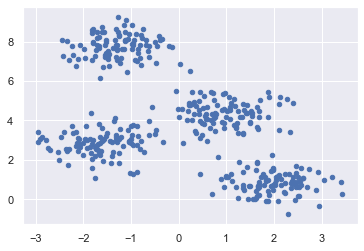

In [1]:
# Начнем с импорта необходимых пакетов
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

# Сгенерируем данные

#from sklearn.datasets.samples_generator import make_blobs
# https://stackoverflow.com/questions/65898399/no-module-named-sklearn-datasets-samples-generator
'''
In the latest versions of scikit-learn, 
there is no module sklearn.datasets.samples_generator - 
it has been replaced with sklearn.datasets (see the docs); 
so, according to the make_blobs documentation, 
your import should simply be:
'''
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:, 1], s=20)
plt.show()

In [2]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
X

array([[ 2.50064460e-01,  6.48826703e+00],
       [-2.69798647e+00,  2.52194722e+00],
       [-2.90007604e+00,  3.06877291e+00],
       [ 7.02950576e-01,  4.31427482e+00],
       [-2.53563494e+00,  2.38449945e+00],
       [-1.70297829e+00,  7.80540956e+00],
       [ 2.22322228e+00,  8.38773426e-01],
       [ 7.93137001e-03,  4.17614316e+00],
       [-1.79041773e+00,  3.02668532e+00],
       [ 1.76747403e+00,  1.26987864e+00],
       [-9.49424332e-01,  7.81974467e+00],
       [ 2.51921931e+00,  1.87335276e-01],
       [ 2.33812285e+00,  3.43116792e+00],
       [-2.39482483e+00,  3.39806103e+00],
       [-7.91981675e-01,  2.95679593e+00],
       [ 3.22881491e+00,  1.13171965e+00],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.62350489e+00,  4.09867867e-01],
       [ 1.21767506e+00,  3.89290127e+00],
       [-1.22768985e+00,  3.54666555e+00],
       [-1.06406044e+00,  3.53554556e+00],
       [-2.07216196e+00,  2.66329169e+00],
       [-1.95483315e+00,  7.15134224e+00],
       [ 1.

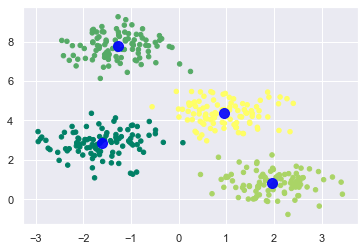

In [3]:
# Построим и визиулизируем центры класета, выбранные с помощью k-средних оценки Python
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap="summer")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9)
plt.show()

### 1.1.1 Пример
Проведем кластеризацию K-средних к набору простых цифр. K-means
попытается идентифицировать похожие цифры

In [4]:
# Начнем с импорта необходимых пакетов
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

# загрузим набор цифр из sklearn
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [5]:
# выполним кластеризацию
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

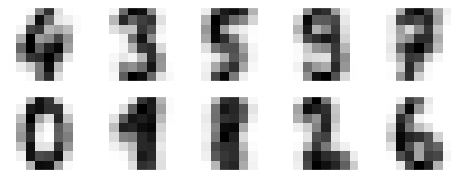

In [6]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### Задание
Дан массив данных

Требуется провести кластерный анализ данных методом k-средних.
Поэкспериментируйте с количеством кластеров.

In [7]:
# Исходные данные
X = np.array([[5,3],
[10,15],
[15,12],
[24,10],
[30,45],
[85,70],
[71,80],
[60,78],
[55,52],
[80,91]])
X

array([[ 5,  3],
       [10, 15],
       [15, 12],
       [24, 10],
       [30, 45],
       [85, 70],
       [71, 80],
       [60, 78],
       [55, 52],
       [80, 91]])

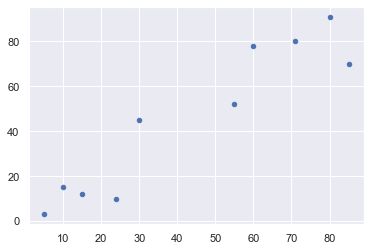

In [8]:
plt.scatter(X[:,0], X[:, 1], s=20)

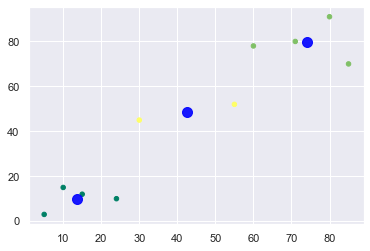

array([0, 0, 0, 0, 2, 1, 1, 1, 2, 1])

In [9]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(X)
y_kmeans3 = kmeans3.predict(X)

centers3 = kmeans3.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans3, s=20, cmap="summer")
plt.scatter(centers3[:, 0], centers3[:, 1], c='blue', s=100, alpha=0.9)
plt.show()
y_kmeans3

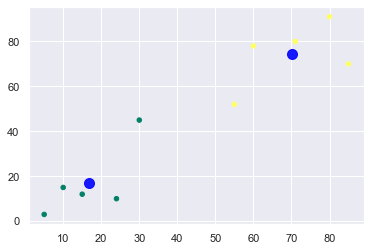

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [10]:
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(X)
y_kmeans2 = kmeans2.predict(X)

centers2 = kmeans2.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans2, s=20, cmap="summer")
plt.scatter(centers2[:, 0], centers2[:, 1], c='blue', s=100, alpha=0.9)
plt.show()
y_kmeans2

### Задание
Выполните кластеризацию для набора данных ирисов Фишера. Выполните
предсказания для модели. Поэкспериментируйте с количеством кластеров.

In [11]:
# импорт данных
data = sns.load_dataset('iris')
data.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


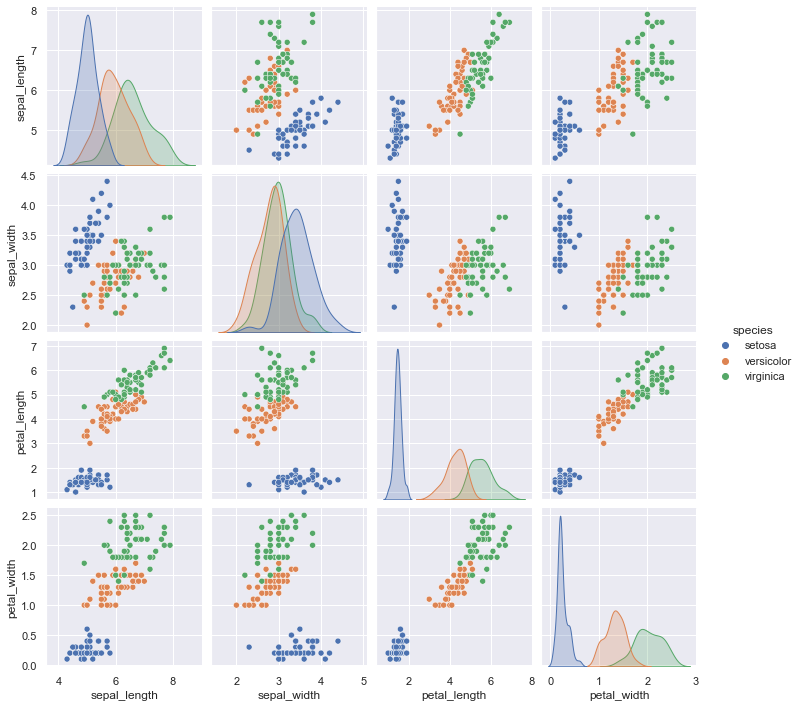

In [12]:
sns.pairplot(data, hue="species")

In [13]:
x = data.iloc[:,0:4]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y = data.species
y.unique() # всего 3 вида ирисов

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [15]:
y.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [16]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

centers = kmeans.cluster_centers_
y_kmeans

# versicolor - 0
# setosa - 1
# virginica - 2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [17]:
data["predict"] = y_kmeans

In [18]:
data.loc[(data.predict == 1), 'predict'] = 'versicolor'
data.loc[(data.predict == 0), 'predict'] = 'setosa'
data.loc[(data.predict == 2), 'predict'] = 'virginica'

# Количество неверных предсказаний
data.loc[(data.predict.values != data.species.values), ('predict', 'species')].count()

predict    136
species    136
dtype: int64

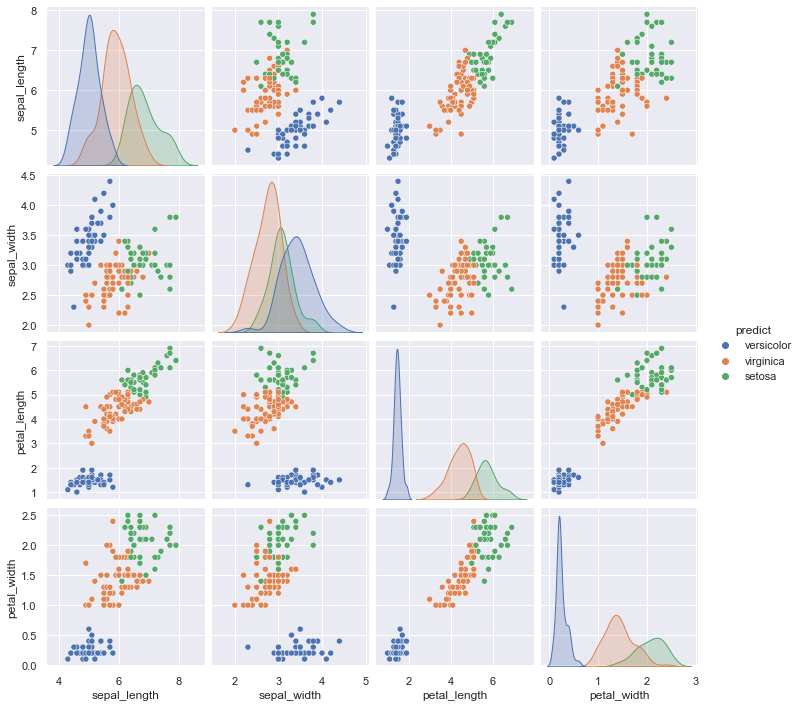

In [19]:
# График по предсказанным значениям 
sns.pairplot(data, hue="predict")

In [20]:
# Найдем accuracy
from sklearn.metrics import accuracy_score
accuracy_score(data.predict, data.species)

0.09333333333333334

In [21]:
data["predict"].value_counts()

virginica     62
versicolor    50
setosa        38
Name: predict, dtype: int64

## Теоретический материал – Иерархическая кластеризация
Алгомеративная кластеризация относится к семейству алгоритмов
кластеризации, в основе которых лежат одинаковые принципы: алгоритм
начинает свою работу с того, что каждую точку данных заносит в свой
собственный кластер и по мере выполнения объединяет два наиболее
схожих между собой кластера до тех пор, пока не будет удовлетворен
определенный критерий остановки. Зачастую данным критерием выступает
это количество кластеров, поэтому схожие между собой кластеры
объединяются до тех пор, пока не останется заданное число кластеров.

Результатом агломеративной кластеризации является иерархическая
кластеризация. Кластеризация выполняется итеративно, и каждая точка
совершает путь от отдельной точки-кластера до участника итогового
кластера. На каждом промежуточном шаге происходит кластеризация
данных (с разным количеством кластеров). Иногда полезно сразу взглянуть
на все возможные кластеризации. Следующий пример показывает
наложение всех возможных кластеризаций, показанных на рис. и дает
некоторое представление о том, как каждый кластер распадается на более
мелкие кластеры.

### 1.1.2 Пример
Построить дендрограмму для заданного массива данных.

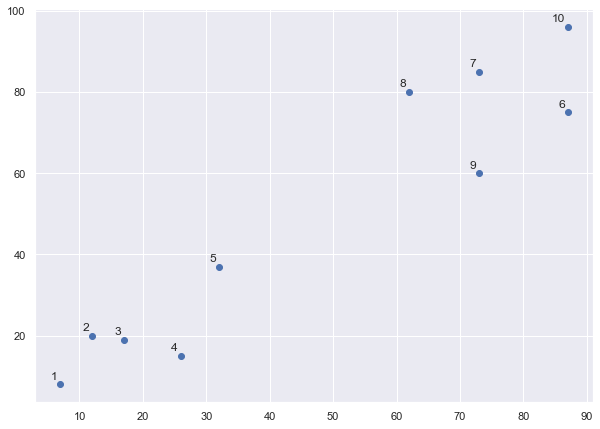

In [22]:
import matplotlib.pyplot as plt
import numpy as np
X = np.array(
    [[7, 8], [12, 20], [17, 19], [26, 15], [32, 37], [87, 75], [73, 85], [62, 80], [73, 60], [87, 96]])
labels = range(1, 11)
plt.figure(figsize = (10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0], X[:,1], label="True Position")
for label, x, y in zip(labels, X[:,0], X[:, 1]):
    plt.annotate(
    label, xy = (x, y), xytext=(-3,3), textcoords="offset points", ha="right", va="bottom")
plt.show()

Далее построим дендрограмму для точек данных с помощью библиотеки
Scipy

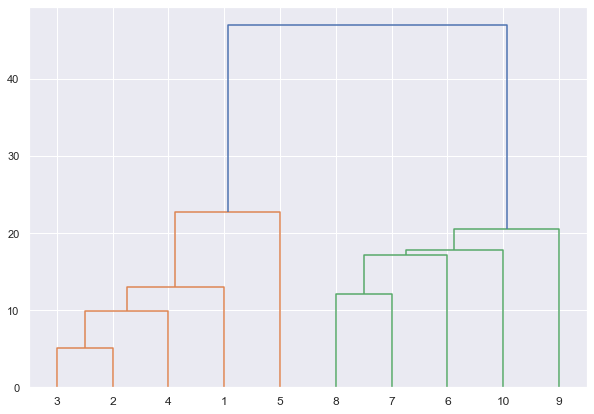

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation="top", labels=labelList,
          distance_sort='descending', show_leaf_counts=True)
plt.show()

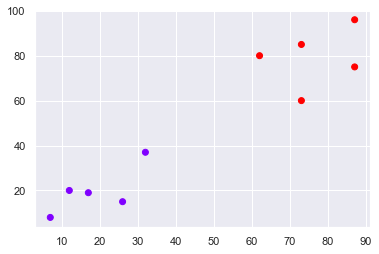

In [24]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:, 1], c=cluster.labels_, cmap='rainbow')

### Пример
В этом примере мы выполним иерархическую кластеризацию реальных
данных и посмотрим, как ее можно использовать для решения реальной
проблемы. Выполним кластеризацию данных по набору
https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv

Задача, которую мы собираемся решить в этом разделе, состоит в том, чтобы
разделить клиентов на разные группы в зависимости от их покупательских
тенденций.

In [25]:
# импортируем библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# загрузим данные
url ="https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv"
customer_data = pd.read_csv(url)
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
customer_data.shape

(200, 5)

Наш набор данных состоит из пяти столбцов. Чтобы просмотреть результаты
в двумерном пространстве, мы сохраним только два из них:«Годовой доход»
(в тысячах долларов) и «Оценка расходов» (1–100). Столбец «Оценка
расходов» показывает, как часто человек тратит деньги в торговом центре
по шкале от 1 до 100, где 100 — это самый высокий расход. Выполним
следующий скрипт, чтобы отфильтровать первые три столбца из нашего
набора данных:

In [27]:
data = customer_data.iloc[:, 3:5].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Далее нам нужно знать кластеры, на которые мы хотим разделить наши
данные. Мы снова будем использовать библиотеку scipy для создания
дендрограммы

<Figure size 5040x2160 with 0 Axes>

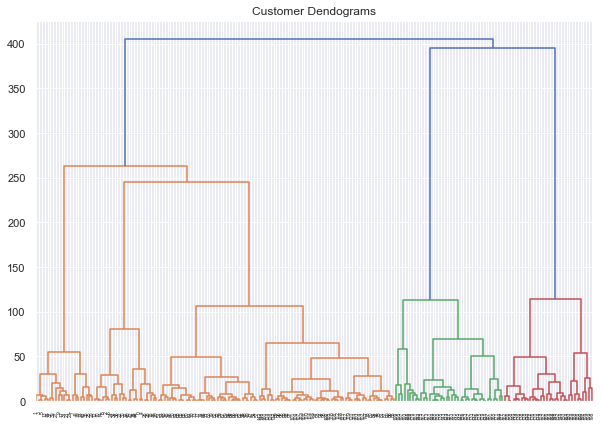

In [28]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

Если мы нарисуем горизонтальную линию, которая проходит через самое
длинное расстояние без горизонтальной линии, мы получим 5 кластеров.
Теперь мы знаем количество кластеров для нашего набора данных,
следующим шагом будет группировка точек данных в эти пять кластеров.

Для этого мы снова воспользуемся классом AgglomerativeClustering
библиотеки sklearn.cluster.

In [29]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

В качестве последнего шага давайте построим кластеры, чтобы увидеть, как
на самом деле были сгруппированы наши данные:

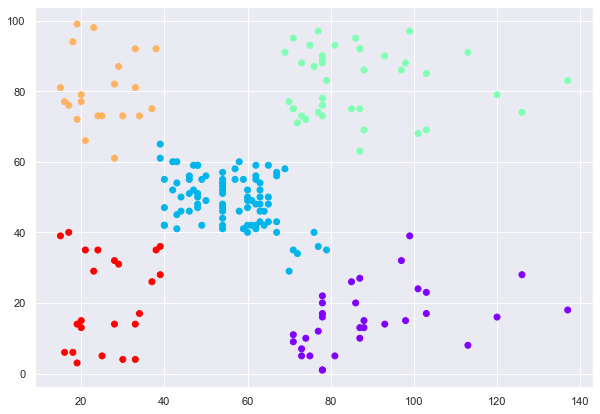

In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap='rainbow')

### Задача
Задание. Выполните иерархическую кластеризацию для набора данных об
ирисах Фишера. При этом необходимо использовать любые два признака
(всего их четыре).

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [32]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [33]:
# Проведем кластеризацию по длине и ширине лепестков ирисов
x = data[["petal_length", "petal_width"]]
# y = data["species"]

<Figure size 5040x2160 with 0 Axes>

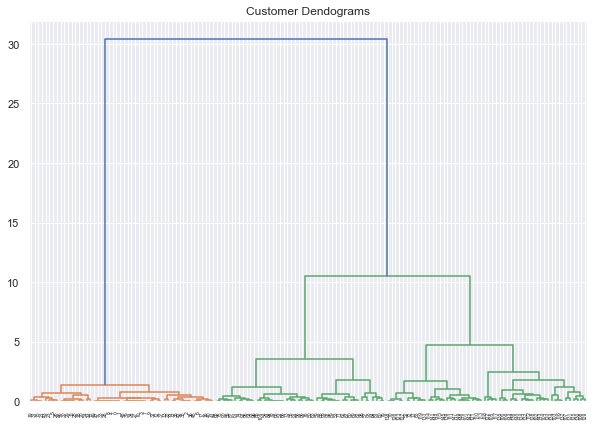

In [34]:
# Построим дендрограмму
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10,7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(x, method='ward'))

In [35]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage='ward')
prediction = cluster.fit_predict(x)

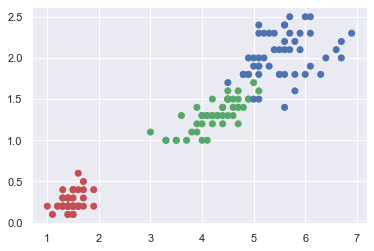

In [36]:
# Реальные значения
y = data['species']

color_dic_y = {'setosa' : 'r',
               'versicolor' : 'g',
               'virginica' : 'b'}

y_colors = [color_dic_y[a] for a in y]

ax1 = plt.scatter(x.petal_length, x.petal_width, c=y_colors)

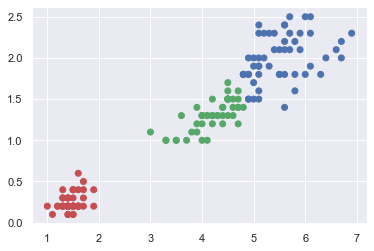

In [37]:
# Результаты кластеризации
colors = {1 : 'r',
          2 : 'g',
          0 : 'b'}

prediction_colors = [colors[a] for a in prediction]
plt.scatter(x.petal_length, x.petal_width, c=prediction_colors)

In [38]:
# Найдем accuracy
from sklearn.metrics import accuracy_score
accuracy_score(prediction_colors, y_colors)

0.96